In [1]:
import scipy

import matplotlib as mpl
import numpy as np
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt

from scipy import stats as st
from scipy.stats import norm
import statsmodels.api as sm

from statsmodels.stats.weightstats import ztest 

%matplotlib inline

In [2]:
plt.style.use('dark_background')

In [3]:
data = pd.read_csv('data/data.csv')['data'].values

In [4]:
data

array([17.49945292, 19.66239904,  7.18282343, 29.84162485,  9.23938649,
       14.94951581, 23.0172885 , 12.52827148, 13.65228669, 14.54595431,
       23.30872427, 33.75324808, 20.24923636, 13.29244733, 23.23434992,
       16.4230418 , 19.88521702, 27.05000732, 15.5127743 , 20.05415151,
       14.73135264, 19.06139498, 21.53942271, 14.06732571, 17.9670682 ,
       18.58289581, 16.17406993, 12.87432628, 11.47269664, 19.07902883,
       18.38565824, 33.38820073,  5.39139454, 20.67635903, 22.22266722,
       28.15780318, 23.01114324, 14.93471778, 20.00005857, 23.25411543,
       18.11895082, 24.62607043,  8.79145607, 30.387108  , 28.80606806,
       17.98593597, 23.66804468, 20.28782355, 15.02518827, 20.52626131,
       26.00219532, 17.71344489, 17.74598346, 19.55317542, 22.60097798,
       27.67027538, 16.19192417, 23.05037746, 21.29669604,  8.84832568,
       17.48410111, 19.20602661, 19.76257856, 21.9560206 ,  7.75806171,
       20.27753314, 15.93394654, 11.36336584, 23.14577858, 24.41

In [5]:
type(data)

numpy.ndarray

In [6]:
data.shape

(100,)

## Testing Sample for Normality

### - Distribution visualization

Сonstruct a data distribution, on which we will superimpose a linear density plot (PDF) of a normal distribution with mean and standard deviation as in our data.

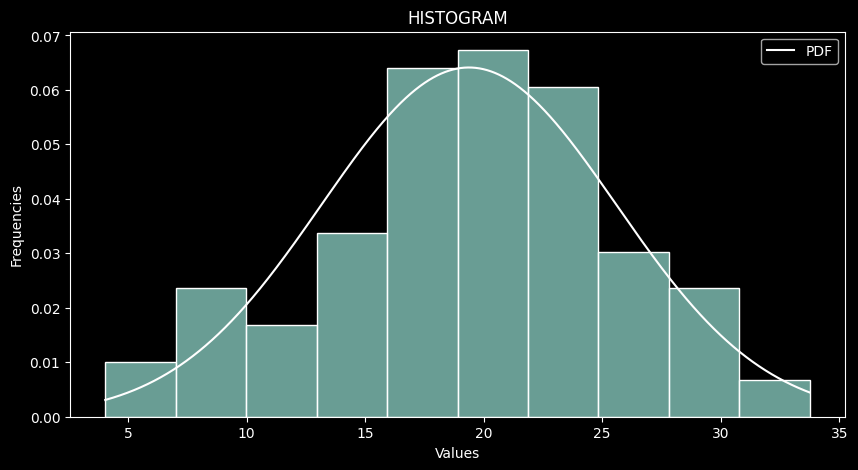

In [7]:
x_axis = np.arange(data.min(), data.max(), 0.01)
plt.figure(figsize=(10, 5))
sns.histplot(data, stat='density')
y_plot = st.norm.pdf(x_axis, loc=data.mean(), scale=data.std())
plt.plot(x_axis, y_plot, label='PDF', color='white')
plt.title('HISTOGRAM')
plt.xlabel('Values')
plt.ylabel('Frequencies')
plt.legend();

#### Conclusion:  
According to the obtained plot, our data is normally distributed.

Additionally, check this with a Q-Q plot

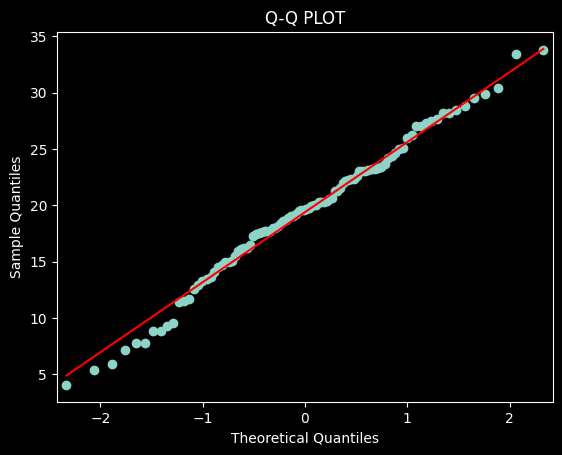

In [8]:
sm.qqplot(data, line='s')
plt.title('Q-Q PLOT');

#### Conclusion:  
So, we can conclude that the distribution of our data is, in general, normal, with slightly overestimated values on the left

### - Using test Shapiro - Wilka  

In [9]:
def print_test_result(test_result):
    """
    Prints the statistical test result and returns a conclusion based on the p-value.

    Parameters:
    test_result (tuple): A tuple containing the statistic value and p-value of the test.

    Returns:
    str: Conclusion of the test based on the p-value.
    """
    less_then_alpha = "Reject H0"
    bigger_then_alpha = "H0 fail to reject"
    print(f'statistic: {test_result[0]}\npvalue: {test_result[1]}')
    if(test_result[1] <  alpha):
        return less_then_alpha
    else:
        return bigger_then_alpha

  H0: distribution is normal  
  H1: distribution is not normal  

In [10]:
alpha = 0.05

In [11]:
test_result = st.shapiro(data)
print_test_result(test_result)


statistic: 0.988785982131958
pvalue: 0.5678303241729736


'H0 fail to reject'

## Statistical Analysis of Sales Results

Let's imagine that our data is the sum of purchases of our customers on the site during July 2022. Until this month, we had sales averaging $20 per check. Did we manage to statistically significantly increase the average transaction value in the last month?

### - Z-Test

In [12]:
data_july = data

H0: average transaction value = 20 dollars  
H1: average transaction value > 20 dollars  

In [13]:
alpha = 0.05
mean_null = 20

In [14]:
test_result = ztest(data_july, value = mean_null, alternative='larger')
print_test_result(test_result)

statistic: -0.9953477389335053
pvalue: 0.8402164165464012


'H0 fail to reject'

#### Conclusion:  
Based on the obtained test results, we can state that we didn't manage to statistically significantly increase the average transaction value in the last month

### - Two-sample Z-Test

Time has passed and we have collected sales data for August 2022, which we have saved in the data_2.csv file. There were slightly more sales, but did the average transaction value change statistically significantly compared to July 2022?

In [15]:
data_august = pd.read_csv('data/data_2.csv')['data'].values

H0: there is no difference between the average transaction value in July and August  
H1: there is difference between the average transaction value in July and August

In [16]:
alpha = 0.05

In [17]:
test_result = ztest(x1=data_july, x2=data_august, value = 0)
print_test_result(test_result)

statistic: 0.005246673456808504
pvalue: 0.9958137794593356


'H0 fail to reject'

#### Conclusion:  
Based on the obtained test results, we can state that we didn't get the average transaction value change statistically significantly compared to July 2022.